# Step 2 Data Wrangling


Data wrangling is the second step in the Data Science Method. This step consists of multiple components including Data Collection, Data Organization, Data Definitions, and Data Cleaning.  


**The Data Science Method**  


1.   [Problem Identification](https://medium.com/@aiden.dataminer/the-data-science-method-problem-identification-6ffcda1e5152)

2.   [**Data Wrangling**](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-data-collection-organization-and-definitions-d19b6ff141c4) 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   [Exploratory Data Analysis](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9)
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   [Pre-processing and Training Data Development](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967)
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   [Modeling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b)
  * Create dummy or indicator features for categorical variable
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   [Documentation](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-documentation-c92c28bd45e6)

  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation



## Data Collection

First, loads the needed packages and modules into Python. Then loads the data into a pandas dataframe for ease of use.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Now prepare to load the csv file of data. CHecks path to the location where the csv file lives on your local machine. 
Starts by printing the current directory.


In [2]:
print(os.getcwd())

/Users/jb/Development/courses/springboard/ds/Assignments/test/big-mountain-resort


Prints the files in current directory to make sure the 'ski_data.csv' is present.

In [3]:
print(os.listdir())

['Notebook_Step4.ipynb', 'Notebook_Step6.ipynb', 'Notebook_Step2.ipynb', '.DS_Store', 'LICENSE', 'Notebook_Step5.ipynb', 'models', 'Notebook_Step3.ipynb', 'README.md', '.gitignore', 'figures', '.ipynb_checkpoints', '.git', 'data']


If you need to change your working directory by defining the path in the next cell make sure to uncomment the code before running the cell. If your path is fine, go on to the Load the data step.

In [4]:
# path=""
# os.chdir(path) 

### Load the data from the csv file
Read your data into a pandas dataframe. This will complete the data collection step as all the data you need for your project are contained in this one csv file.
**Double check** that the path is correct, and that between the `file` name and the `path`, you have the full location of your `ski_data.csv`

Loads the data into a pandas dataframe and print the first five rows of the dataframe.

In [5]:
df = pd.read_csv('data/ski_data.csv')
df.head(5)

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## Data Organization

Data organization for this project involves creating a basic project folder structure. Creates a few subfolders to keep your project organized.

In [6]:
# path=""

In [7]:
# print ("The current working directory is %s" % path)

### Create subfolders in the project directory

Creates some subfolders inside the project folder.

Create a subfolder called `data`.

In [8]:
!mkdir data

mkdir: data: File exists


Creates a folder for the data visualizations which will be created in future steps called `figures`.

In [9]:
!mkdir figures

mkdir: figures: File exists


Creates a folder for the models saved, called `models`.

In [10]:
!mkdir models

mkdir: models: File exists


Print the contents of the project folder to confirm you created the additional folders in the working directory.

In [11]:
print(os.listdir())

['Notebook_Step4.ipynb', 'Notebook_Step6.ipynb', 'Notebook_Step2.ipynb', '.DS_Store', 'LICENSE', 'Notebook_Step5.ipynb', 'models', 'Notebook_Step3.ipynb', 'README.md', '.gitignore', 'figures', '.ipynb_checkpoints', '.git', 'data']


## Data Definition
In this step, review column names, data types, and null values.

### Column Names 
Prints the columns names of the entire dataframe.

In [12]:
df.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

In [13]:
df = df.rename(columns={"Snow Making_ac": "Snow_Making_ac"})

### Data Types 
Reviewed which columns are integer, float, categorical, or dates. Made sure the data type is loaded properly in the dataframe. 

In [14]:
df.dtypes

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow_Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object

The `df.info()` function also prints the count of non-null values per column. Use this function to review the column names, null value counts and data types of the data frame.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

Some of these column names are easy to understand but others are not as clear. Here is a metadata file with information about each column to help understand what the column names refer to. Review the metadata table below for more information about each column.

Descriptions of Columns

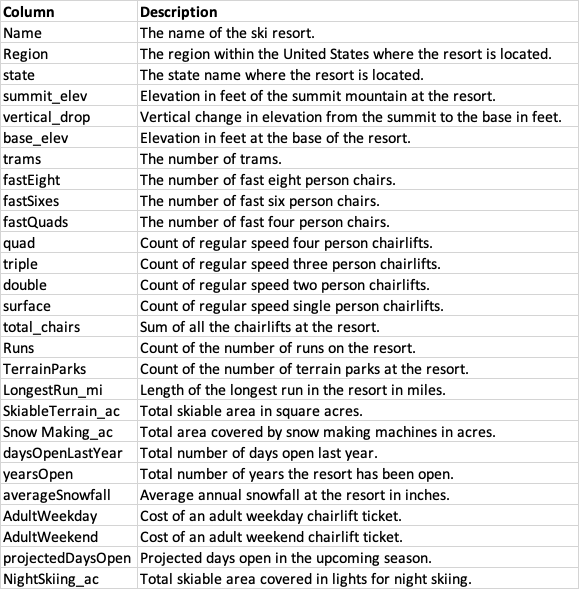

There are some null or missing values needed to mitgate in a later step. However, let's look at the counts of unique values or codes per column first.

### Count of unique values or codes
Prints the count of unique values for every column, regardless of data type.

In [16]:
for col in df:
    col_u = df[col].unique()
    print(col, '\n', col_u.size, '\t', col_u.dtype, '\n')


Name 
 329 	 object 

Region 
 38 	 object 

state 
 35 	 object 

summit_elev 
 266 	 int64 

vertical_drop 
 193 	 int64 

base_elev 
 244 	 int64 

trams 
 5 	 int64 

fastEight 
 3 	 float64 

fastSixes 
 7 	 int64 

fastQuads 
 14 	 int64 

quad 
 7 	 int64 

triple 
 9 	 int64 

double 
 10 	 int64 

surface 
 12 	 int64 

total_chairs 
 31 	 int64 

Runs 
 111 	 float64 

TerrainParks 
 12 	 float64 

LongestRun_mi 
 43 	 float64 

SkiableTerrain_ac 
 194 	 float64 

Snow_Making_ac 
 144 	 float64 

daysOpenLastYear 
 112 	 float64 

yearsOpen 
 73 	 float64 

averageSnowfall 
 108 	 float64 

AdultWeekday 
 84 	 float64 

AdultWeekend 
 82 	 float64 

projectedDaysOpen 
 91 	 float64 

NightSkiing_ac 
 79 	 float64 



Prints the percent of unique values per column. Use the `df.nunique` and the size of the dataframe to calculate the percentages.

In [17]:
for col in df:
    col_u = df[col].nunique()
    print(col)
    print(col_u/df[col].shape[0] * 100)
    print()
# df.nunique

Name
99.69696969696969

Region
11.515151515151516

state
10.606060606060606

summit_elev
80.60606060606061

vertical_drop
58.484848484848484

base_elev
73.93939393939394

trams
1.5151515151515151

fastEight
0.6060606060606061

fastSixes
2.1212121212121215

fastQuads
4.242424242424243

quad
2.1212121212121215

triple
2.727272727272727

double
3.0303030303030303

surface
3.6363636363636362

total_chairs
9.393939393939393

Runs
33.33333333333333

TerrainParks
3.3333333333333335

LongestRun_mi
12.727272727272727

SkiableTerrain_ac
58.484848484848484

Snow_Making_ac
43.333333333333336

daysOpenLastYear
33.63636363636363

yearsOpen
21.818181818181817

averageSnowfall
32.42424242424242

AdultWeekday
25.151515151515152

AdultWeekend
24.545454545454547

projectedDaysOpen
27.27272727272727

NightSkiing_ac
23.636363636363637



When working with categorical columns, it's really helpful to know what the unique codes are. For example, if you look at the `Region` or `state` column, you can print out the different states in the dataframe.

In [18]:
print(df.state.value_counts())
print()
print(df.Region.value_counts())

New York          33
Michigan          29
Colorado          22
California        21
Pennsylvania      19
New Hampshire     16
Wisconsin         16
Vermont           15
Minnesota         14
Utah              13
Montana           12
Idaho             12
Massachusetts     11
Oregon            10
Washington        10
New Mexico         9
Maine              9
Wyoming            8
North Carolina     6
Connecticut        5
Ohio               5
Nevada             4
Virginia           4
West Virginia      4
Illinois           4
Iowa               3
Alaska             3
New Jersey         2
South Dakota       2
Arizona            2
Indiana            2
Missouri           2
Tennessee          1
Maryland           1
Rhode Island       1
Name: state, dtype: int64

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
New Hampshire          16
Wisconsin              16
Vermont                15
Minnesota              14
Mont

In [19]:
states_df = df.groupby('state').mean()
states_df = pd.concat([df.state.value_counts(), states_df], axis=1)
# states_df = states_df[['summit_elev','vertical_drop', 'AdultWeekend', 'AdultWeekday', 'total_chairs', 'Runs', 'SkiableTerrain_ac', 'Snow_Making_ac', 'NightSkiing_ac', 'yearsOpen', 'averageSnowfall']]
states_df['state_count'] = states_df.state
states_df.drop('state', axis=1, inplace=True)
states_df.index.name = 'NAME'

states_df = states_df.reset_index()

states_df

,NAME,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,state_count
0,New York,2145.848485,889.272727,1217.848485,0.090909,0.000000,0.090909,0.393939,0.787879,1.060606,...,167.090909,144.250000,108.363636,56.757576,131.266667,50.032258,58.945455,112.125000,113.440000,33
1,Michigan,1195.827586,394.206897,794.724138,0.000000,0.000000,0.034483,0.103448,1.068966,1.517241,...,154.689655,128.222222,103.869565,124.517241,133.538462,45.458333,52.576923,111.363636,84.608696,29
2,Colorado,11535.772727,2499.863636,9066.454545,0.681818,0.000000,0.818182,4.000000,0.818182,1.681818,...,3121.909091,324.578947,148.090909,60.227273,303.409091,90.714286,90.714286,144.761905,107.000000,22
3,California,8524.476190,1643.047619,6903.428571,0.380952,0.000000,0.285714,2.047619,0.666667,2.428571,...,1235.619048,475.882353,152.111111,66.190476,310.904762,78.214286,81.416667,146.450000,146.750000,21
4,Pennsylvania,1821.105263,699.684211,1122.631579,0.000000,0.000000,0.157895,0.263158,1.210526,1.263158,...,104.888889,101.277778,93.600000,51.105263,54.444444,52.705882,63.687500,95.888889,89.882353,19
5,New Hampshire,2525.500000,1370.437500,1142.562500,0.125000,0.000000,0.062500,1.187500,0.687500,1.812500,...,214.187500,179.875000,123.133333,61.125000,132.375000,65.571429,76.500000,128.600000,62.666667,16
6,Wisconsin,1273.375000,351.187500,926.750000,0.000000,0.000000,0.062500,0.437500,0.750000,1.000000,...,112.500000,101.625000,101.266667,57.400000,61.466667,46.428571,54.266667,108.000000,79.642857,16
7,Vermont,3500.066667,1991.933333,1503.333333,0.466667,0.000000,0.466667,1.600000,1.866667,1.466667,...,482.600000,278.600000,136.692308,67.733333,225.466667,83.500000,87.900000,135.769231,50.000000,15
8,Minnesota,1251.500000,361.714286,886.214286,0.071429,0.000000,0.071429,0.142857,1.500000,1.000000,...,111.428571,99.857143,106.428571,49.642857,64.000000,44.595714,49.667143,111.571429,78.461538,14
9,Utah,9709.076923,2261.307692,7479.307692,0.692308,0.000000,0.538462,3.307692,1.076923,2.230769,...,2346.769231,326.333333,140.363636,56.923077,406.153846,89.083333,93.000000,137.000000,160.500000,13


In [20]:
# Import geopandas package
import geopandas as gpd

fp = './data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp'

# Read in shapefile and examine data
contiguous_usa = gpd.read_file(fp)
contiguous_usa.head()

# contiguous_usa.iloc[0]['geometry']
contiguous_usa = contiguous_usa[['geometry', 'NAME']]
contiguous_usa.head()


,geometry,NAME
0,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Mississippi
1,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina
2,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",Oklahoma
3,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia
4,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",West Virginia


In [21]:
# Merge shapefile with population data


pop_states = pd.merge(contiguous_usa, states_df, how='outer', on='NAME')

# pop_states.drop('NAME', axis=1, inplace=True)

# Drop Alaska and Hawaii
pop_states = pop_states.loc[~pop_states['NAME'].isin(['Alaska', 'Hawaii', 'Guam', 'Puerto Rico', 'United States Virgin Islands', 'American Samoa', 'Commonwealth of the Northern Mariana Islands'])]
# pop_states
# pop_states = pop_states[['geometry', 'Name', 'PopEstimate2018']]
pop_states

,geometry,NAME,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,state_count
0,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Mississippi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina,4726.000000,675.833333,4045.000000,0.000000,0.000000,0.166667,0.000000,1.333333,...,61.666667,61.666667,101.200000,53.500000,49.500000,41.833333,64.166667,97.600000,55.833333,6.0
2,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia,2847.500000,828.250000,2003.000000,0.000000,NaN,0.500000,0.000000,1.250000,...,67.250000,81.000000,91.500000,51.000000,37.250000,51.000000,68.000000,103.250000,45.000000,4.0
4,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",West Virginia,4248.250000,988.250000,3260.750000,0.000000,NaN,0.000000,0.750000,1.250000,...,135.500000,130.500000,114.000000,41.750000,147.500000,62.500000,79.750000,116.500000,62.333333,4.0
5,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",Louisiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",Michigan,1195.827586,394.206897,794.724138,0.000000,0.000000,0.034483,0.103448,1.068966,...,154.689655,128.222222,103.869565,124.517241,133.538462,45.458333,52.576923,111.363636,84.608696,29.0
7,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",Massachusetts,1473.545455,632.000000,824.727273,0.000000,0.000000,0.090909,0.272727,0.636364,...,106.000000,88.909091,111.833333,56.545455,84.777778,40.900000,57.200000,117.428571,72.875000,11.0
8,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",Idaho,7415.166667,1820.833333,5595.833333,0.166667,0.000000,0.083333,1.416667,0.250000,...,1366.333333,171.285714,113.600000,61.833333,292.727273,56.555556,55.900000,131.125000,83.000000,12.0
9,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


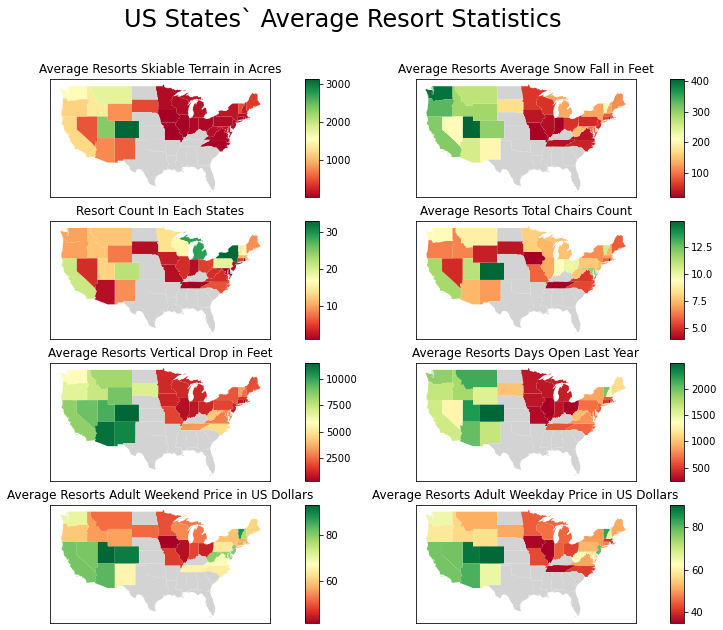

In [22]:

from mpl_toolkits.axes_grid1 import make_axes_locatable 

fig, ax = plt.subplots(4, 2, figsize=(12, 10))
fig.suptitle('US States` Average Resort Statistics', fontsize=24)

def plot_geo(col, ax, title):
    ax.title.set_text(title)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    pop_states.plot(column=col, 
                    ax=ax,
                    cax=cax,
                    legend=True,
                    cmap='RdYlGn',
                    missing_kwds={
                        "color": "lightgrey",
#                         "edgecolor": "red",
#                         "hatch": "///",
#                         "label": "Missing values",
                    })
    


plot_geo(col='SkiableTerrain_ac', ax=ax[0][0], title='Average Resorts Skiable Terrain in Acres')
plot_geo(col='averageSnowfall', ax=ax[0][1], title='Average Resorts Average Snow Fall in Feet')
plot_geo(col='state_count', ax=ax[1][0], title='Resort Count In Each States')
plot_geo(col='total_chairs', ax=ax[1][1], title='Average Resorts Total Chairs Count')
plot_geo(col='summit_elev', ax=ax[2][0], title='Average Resorts Vertical Drop in Feet')
plot_geo(col='vertical_drop', ax=ax[2][1], title='Average Resorts Days Open Last Year')
plot_geo(col='AdultWeekend', ax=ax[3][0], title='Average Resorts Adult Weekend Price in US Dollars')
plot_geo(col='AdultWeekday', ax=ax[3][1], title='Average Resorts Adult Weekday Price in US Dollars')
plt.savefig('figures/ResortStatsMap_fig1.png',bbox_inches='tight')


### Range of values per column

Prints the range of values using the aggregate function.

In [23]:
print(df.iloc[:,3:].agg([np.min, np.max]).T)


                    amin     amax
summit_elev        315.0  13487.0
vertical_drop       60.0   4425.0
base_elev           70.0  10800.0
trams                0.0      4.0
fastEight            0.0      1.0
fastSixes            0.0      6.0
fastQuads            0.0     15.0
quad                 0.0      8.0
triple               0.0      8.0
double               0.0     14.0
surface              0.0     15.0
total_chairs         0.0     41.0
Runs                 3.0    341.0
TerrainParks         1.0     14.0
LongestRun_mi        0.0      6.0
SkiableTerrain_ac    8.0  26819.0
Snow_Making_ac       2.0   3379.0
daysOpenLastYear     3.0    305.0
yearsOpen            6.0   2019.0
averageSnowfall     18.0    669.0
AdultWeekday        15.0    179.0
AdultWeekend        17.0    179.0
projectedDaysOpen   30.0    305.0
NightSkiing_ac       2.0    650.0


Review the numeric dataset's summary statistics.

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


## Data Cleaning

### Handle the missing and NA values
The code below to print out the percent of each feature that is missing. The result of the code is 13 columns out of 27 with missing data. Most of these are missing less than 10% of the data. 


*   Consider the columns individually 
*   Identify the appropriate fill method for each column



In [25]:
nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns=['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
fastEight,0.503030
NightSkiing_ac,0.433333
AdultWeekday,0.163636
AdultWeekend,0.154545
daysOpenLastYear,0.154545
TerrainParks,0.154545
projectedDaysOpen,0.142424
Snow_Making_ac,0.139394
averageSnowfall,0.042424
LongestRun_mi,0.015152


Let's review each of these columns in the data.


*   fastEight is the number of fast eight-person ski lifts at each of the resorts. In addition, you have the counts of all the other types of chairs at each resort and the total number of chairs as well. You can simply subtract the number of fastEight lifts from the total to determine if any of the missing values can be backfilled or if they should be equal to zero. Follow the next step below and see for yourself how to review and backfill these missing values. These columns contain all the resort lift counts by type.


* trams	
* fastEight	
* fastSixes	
* fastQuads	
* quad
* triple	
* double	
* surface	
* total_chairs <- the sum of these columns for each row.




In order to determine an appropriate fill value for the fastEigth column, you need to calculate the difference between the sum of all the chairlift columns and the `total_chairs` column.

In [26]:
 (df[['total_chairs']].sum(axis=1) - df[['trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface']].sum(axis=1)).sum()

0.0

As you can see from running the above cell, there are no fastEight lift values missing because the difference between the sum of all the lift columns and the 'total_chairs' column is zero for every row in the dataframe. This confirms that you can therefore replace the missing values for the fastEight rows with zeros.

In [27]:
df.fastEight.fillna(0, inplace=True)

Consider the next column with missing values, 'NightSkiing_ac'. This column represents the number of acres of night skiing availble at this resort. Not all resorts have night skiing because it requires stadium lights and is not that popular with skiers and snowboarders. Given that information, it is also safe to assume that if there are missing values in this column, it is due to there not being any night skiing acres available at that resort so you can fill missing values with zeros safely. 

In [28]:
df.NightSkiing_ac.fillna(0, inplace=True)

Next, let's consider the ticket price columns 'AdultWeekday' & 'AdultWeekend'. You know that there has to be a price for these that happens to be missing so, in this case, you cannot fill the missing values with zeros. Instead, you have a few options about what value you can use to fill the missing rows. You can simply take the mean of the column in consideration or you could backfill or forwardfill from the resort in the row before or after your missing value. Backfill and forward fill would be more reasonable in a situation where the data are in a particular order where the rows near each other are similar to each other in the price column. You could also build an imputation model to use a model to predict the value based on the data values in adjacent columns as well as adjacent rows. 

In [29]:
# fill AdultWeekday will mean
df.AdultWeekday.fillna((df.AdultWeekday.mean()), inplace=True)

In [30]:
# fill AdultWeekend will mean
df.AdultWeekend.fillna((df.AdultWeekend.mean()), inplace=True)

In [31]:
nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns=['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
daysOpenLastYear,0.154545
TerrainParks,0.154545
projectedDaysOpen,0.142424
Snow_Making_ac,0.139394
averageSnowfall,0.042424
LongestRun_mi,0.015152
Runs,0.012121
SkiableTerrain_ac,0.009091
yearsOpen,0.003030


Using what we know about the remaining columns missing data and decide whether to fill with a zero or to fill with a median. plus we noticedmbuy luck that yearsOpen had some easy fixes.


In [32]:
# fill daysOpenLastYear with mean
df.daysOpenLastYear.fillna((df.daysOpenLastYear.mean()), inplace=True)

# fill projectedDaysOpen with mean
df.projectedDaysOpen.fillna((df.projectedDaysOpen.mean()), inplace=True)

# fill averageSnowfall with mean
df.averageSnowfall.fillna((df.averageSnowfall.mean()), inplace=True)

# fill LongestRun_mi with mean
df.LongestRun_mi.fillna((df.LongestRun_mi.mean()), inplace=True)

# fill Runs with mean
df.Runs.fillna((df.Runs.mean()), inplace=True)

# fill SkiableTerrain_ac with median
df.SkiableTerrain_ac.fillna((df.SkiableTerrain_ac.median()), inplace=True)

# fill yearsOpen with mean
df.yearsOpen.fillna(0, inplace=True)
# change a 2019 to 1 year
df.loc[df.yearsOpen == df.yearsOpen.max(), 'yearsOpen'] = 1.0

# fill TerrainParks with 0 because if they didn't have a terrain park the probably left it blank similar to the night skiing
df.TerrainParks.fillna(0, inplace=True)

# # fill Snow_Making_ac with mean
df.Snow_Making_ac.fillna((df.Snow_Making_ac.mean()), inplace=True)



In [33]:
nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns=['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


In [34]:
# Big Mountain Resort change its name in 2007 to Whitefish Mountain Resort. Let's Change the name in the dataset.
df[df['Name'].str.contains('Big Mountain Resort')]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
151,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.0,0,3,...,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0


In [35]:
df.loc[df.Name == 'Big Mountain Resort', 'Name'] = 'Whitefish Mountain Resort'

In [36]:
df[df['Name'].str.contains('Big Mountain Resort')]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac


In [37]:
df[df['Name'].str.contains('Whitefish Mountain Resort')]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
151,Whitefish Mountain Resort,Montana,Montana,6817,2353,4464,0,0.0,0,3,...,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0


### Look for duplicate rows
Run the code below to print out the duplicated rows.

In [38]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac


## Export data to a new csv file 
In order to bring the changes you made here into the next notebook, write out the updated data frame to a new csv file.

Export the processed dataframe as a csv file to the data folder created earlier. Name this new csv file `step2_output.csv`.


In [39]:
df.to_csv('data/step2_output.csv', index=False)

The data transformations created in this step of the DSM are all generally steps to be applied to any data science project. However, the decisions we made about how to handle the missing and NA data are specific to the problem at hand. In the next step of the DSM, see how all these steps prepare the data for exploratory data analysis.